In [111]:
import numpy as np
import matplotlib.pyplot as plt 

In [112]:
path='../results_clean/CIFAR_FINAL/ClearBoundary/'

In [113]:
acc_mesu= np.loadtxt(path+'MESU/acc_test')
acc_det= np.loadtxt(path+'DET/acc_test')
acc_ewc= np.loadtxt(path+'EWC/acc_test')
acc_si= np.loadtxt(path+'si8/acc_test')

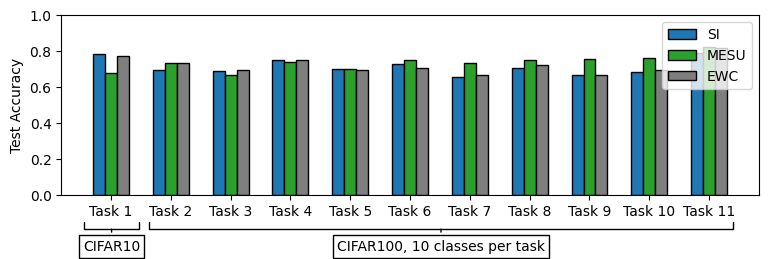

0.7123272727272728
0.7192454545454545
0.7346090909090909


In [114]:
tasks = [f"Task {i+1}" for i in range(11)]

# Plotting parameters
x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars

# Creating figure with specified size
fig, ax = plt.subplots(figsize=(9, 2.72))
fig.subplots_adjust(bottom=0.22)  # Adjust bottom margin to fit text properly
# Bar plots
bars1 = ax.bar(x - width , acc_si[-1], width, label='SI', color='C0', edgecolor='black')
bars2 = ax.bar(x , acc_mesu[-1], width, label='MESU', color='C2', edgecolor='black')
bars2 = ax.bar(x + width , acc_ewc[-1], width, label='EWC', color='C7', edgecolor='black')

# Labels and title
ax.set_ylabel('Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.set_ylim([0., 1])
ax.annotate('CIFAR10', xy=(0.124, 0.12), xytext=(0.124, 0.02), xycoords='figure fraction', 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=0.5', lw=1.))

ax.annotate('CIFAR100, 10 classes per task', xy=(0.49, 0.12), xytext=(0.49, 0.02), xycoords='figure fraction', 
    fontsize=10, ha='center', va='bottom',
    bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=21, lengthB=0.5', lw=1.0))
ax.legend()



# Saving the figure
plt.savefig("cifar110_1split.svg", format='svg')
plt.show()
print(acc_si[-1].mean())
print(acc_ewc[-1].mean())
print(acc_mesu[-1].mean())

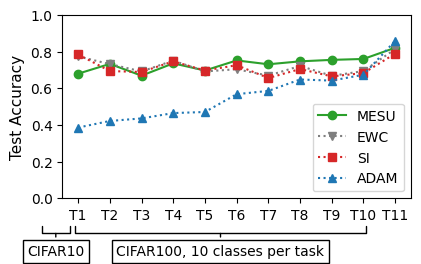

In [115]:
tasks = [f"T{i+1}" for i in range(11)]

# Plotting parameters
x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars

# Creating figure
fig, ax = plt.subplots(figsize=(4.5, 2.78))  # Increased size
fig.subplots_adjust(bottom=0.22)

# Different markers and line styles
plt.plot(x, acc_mesu[-1], '-o', label='MESU', color='C2', markersize=6)
plt.plot(x, acc_ewc[-1], ':v', label='EWC', color='C7', markersize=6)
plt.plot(x, acc_si[-1], ':s', label='SI', color='C3', markersize=6)
plt.plot(x, acc_det[-1], ':^', label='ADAM', color='C0', markersize=6)

# Labels and title
ax.set_ylabel('Test Accuracy', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(tasks, fontsize=10)
ax.set_ylim([0., 1])

# Annotations
ax.annotate('CIFAR10', xy=(0.124, 0.12), xytext=(0.124, 0.02), xycoords='figure fraction', 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=0.5', lw=1.))

ax.annotate('CIFAR100, 10 classes per task', xy=(0.49, 0.12), xytext=(0.49, 0.02), xycoords='figure fraction', 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=10.5, lengthB=0.5', lw=1.0))

# Adjust legend position outside the plot
plt.legend(fontsize=10)

# Saving the figure
plt.savefig("cifar110_1split.svg", format='svg', bbox_inches="tight")
plt.show()


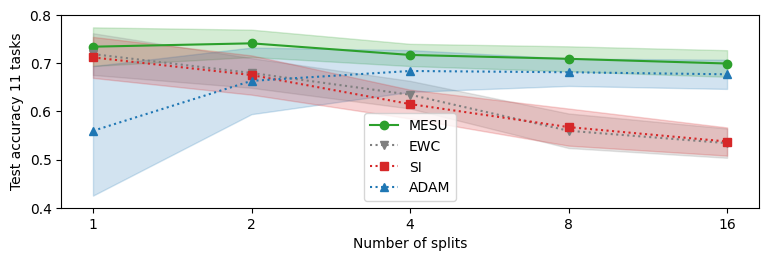

In [116]:
# Compute mean and std
Mean_mesu = [np.mean(acc_mesu[-1])]
Mean_ewc = [np.mean(acc_ewc[-1])]
Mean_det = [np.mean(acc_det[-1])]
Mean_si = [np.mean(acc_si[-1])]


std_mesu = [np.std(acc_mesu[-1])]
std_ewc = [np.std(acc_ewc[-1])]
std_det = [np.std(acc_det[-1])]
std_si = [np.std(acc_si[-1])]

path='../results_clean/CIFAR_FINAL/'
for i in range(4):
    Mean_mesu.append(np.loadtxt(path+'seasonmesu3/MESU/simu'+str(i+1)+'/acc_test')[-1].mean())
    Mean_ewc.append(np.loadtxt(path+'seasonewc2/EWC/simu'+str(i+1)+'/acc_test')[-1].mean())
    Mean_det.append(np.loadtxt(path+'seasondet/DET/simu'+str(i+1)+'/acc_test')[-1].mean())
    Mean_si.append(np.loadtxt(path+'SI_SEASON/simu'+str(i+1)+'/acc_test')[-1].mean())

    std_mesu.append(np.loadtxt(path+'seasonmesu3/MESU/simu'+str(i+1)+'/acc_test')[-1].std())
    std_ewc.append(np.loadtxt(path+'seasonewc2/EWC/simu'+str(i+1)+'/acc_test')[-1].std())
    std_det.append(np.loadtxt(path+'seasondet/DET/simu'+str(i+1)+'/acc_test')[-1].std())
    std_si.append(np.loadtxt(path+'SI_SEASON/simu'+str(i+1)+'/acc_test')[-1].std())
x_values = [1, 2, 3, 4, 5]

# Plot lines
fig, ax = plt.subplots(figsize=(9, 2.5))
plt.plot(x_values, Mean_mesu, '-o',label='MESU', color='C2')
plt.plot(x_values, Mean_ewc,':v' ,label='EWC', color='C7')
plt.plot(x_values, Mean_si,':s', label='SI', color='C3')
plt.plot(x_values, Mean_det,':^', label='ADAM', color='C0')

# Add shaded regions for standard deviation
plt.fill_between(x_values, np.array(Mean_mesu) - np.array(std_mesu), np.array(Mean_mesu) + np.array(std_mesu), color='C2', alpha=0.2)
plt.fill_between(x_values, np.array(Mean_ewc) - np.array(std_ewc), np.array(Mean_ewc) + np.array(std_ewc), color='C7', alpha=0.2)
plt.fill_between(x_values, np.array(Mean_det) - np.array(std_det), np.array(Mean_det) + np.array(std_det), color='C0', alpha=0.2)
plt.fill_between(x_values, np.array(Mean_si) - np.array(std_si), np.array(Mean_si) + np.array(std_si), color='C3', alpha=0.2)

# Formatting
plt.xticks(x_values, ['1', '2', '4', '8', '16'])
plt.legend()
plt.xlabel('Number of splits')
plt.ylabel('Test accuracy 11 tasks')
plt.ylim([0.4,0.8])
plt.savefig("cifar_season.svg", format='svg')
plt.show()

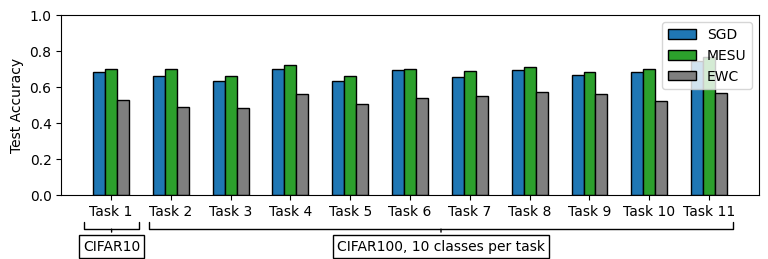

In [117]:
acc_mesu= np.loadtxt(path+'seasonmesu3/MESU/simu4/acc_test')
acc_det= np.loadtxt(path+'seasondet/DET/simu4/acc_test')
acc_ewc= np.loadtxt(path+'seasonewc2/EWC/simu4/acc_test')   
acc_si= np.loadtxt(path+'SI_SEASON/simu4/acc_test')   

tasks = [f"Task {i+1}" for i in range(11)]

# Plotting parameters
x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars

# Creating figure with specified size
fig, ax = plt.subplots(figsize=(9, 2.72))
fig.subplots_adjust(bottom=0.22)  # Adjust bottom margin to fit text properly
# Bar plots
bars1 = ax.bar(x - width , acc_det[-1], width, label='SGD', color='C0', edgecolor='black')
bars2 = ax.bar(x , acc_mesu[-1], width, label='MESU', color='C2', edgecolor='black')
bars2 = ax.bar(x + width , acc_ewc[-1], width, label='EWC', color='C7', edgecolor='black')

# Labels and title
ax.set_ylabel('Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.set_ylim([0., 1])
ax.annotate('CIFAR10', xy=(0.124, 0.12), xytext=(0.124, 0.02), xycoords='figure fraction', 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=0.5', lw=1.))

ax.annotate('CIFAR100, 10 classes per task', xy=(0.49, 0.12), xytext=(0.49, 0.02), xycoords='figure fraction', 
    fontsize=10, ha='center', va='bottom',
    bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=21, lengthB=0.5', lw=1.0))
ax.legend()



# Saving the figure
plt.savefig("cifar110_16splits.svg", format='svg')
plt.show()


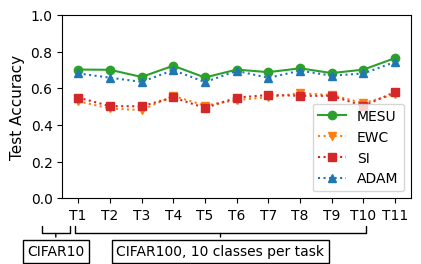

In [ ]:
tasks = [f"T{i+1}" for i in range(11)]

# Plotting parameters
x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars

# Creating figure
fig, ax = plt.subplots(figsize=(4.5, 2.78))  # Increased size
fig.subplots_adjust(bottom=0.22)

# Different markers and line styles
plt.plot(x, acc_mesu[-1], '-o', label='MESU', color='C2', markersize=6)
plt.plot(x, acc_ewc[-1], ':v', label='EWC', color='C7', markersize=6)
plt.plot(x, acc_si[-1], ':s', label='SI', color='C3', markersize=6)
plt.plot(x, acc_det[-1], ':^', label='ADAM', color='C0', markersize=6)

# Labels and title
ax.set_ylabel('Test Accuracy', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(tasks, fontsize=10)
ax.set_ylim([0., 1])

# Annotations
ax.annotate('CIFAR10', xy=(0.124, 0.12), xytext=(0.124, 0.02), xycoords='figure fraction', 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=0.5', lw=1.))

ax.annotate('CIFAR100, 10 classes per task', xy=(0.49, 0.12), xytext=(0.49, 0.02), xycoords='figure fraction', 
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=10.5, lengthB=0.5', lw=1.0))

# Adjust legend position outside the plot
plt.legend(fontsize=10)

# Saving the figure
plt.savefig("cifar110_16split.svg", format='svg', bbox_inches="tight")
plt.show()
